In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [18]:
# Dataset path
base_dir = "dataset"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

print(train_dir)
print(test_dir)

dataset\train
dataset\test


In [19]:
# Image size and batch config
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [20]:
# Define the CNN model
model = models.Sequential([
    Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Evaluate model
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2f}")

# Save the model in Keras format
model.save("cat_dog_classifier.keras")

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 844ms/step - accuracy: 0.5349 - loss: 1.1314 - val_accuracy: 0.5000 - val_loss: 0.7456
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 755ms/step - accuracy: 0.5396 - loss: 0.6889 - val_accuracy: 0.5455 - val_loss: 0.6897
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 740ms/step - accuracy: 0.5625 - loss: 0.6839 - val_accuracy: 0.6727 - val_loss: 0.6622
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 809ms/step - accuracy: 0.5916 - loss: 0.6644 - val_accuracy: 0.6364 - val_loss: 0.6571
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 816ms/step - accuracy: 0.6212 - loss: 0.6455 - val_accuracy: 0.6364 - val_loss: 0.6495
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 739ms/step - accuracy: 0.6239 - loss: 0.6511 - val_accuracy: 0.6000 - val_loss: 0.6602
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 766ms/step - accuracy: 0.6315 - loss: 0.6182 - val_accuracy: 0.6636 - val_loss: 0.6250
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 790ms/step - accuracy: 0.6609 - loss: 0.6096 - val_accu

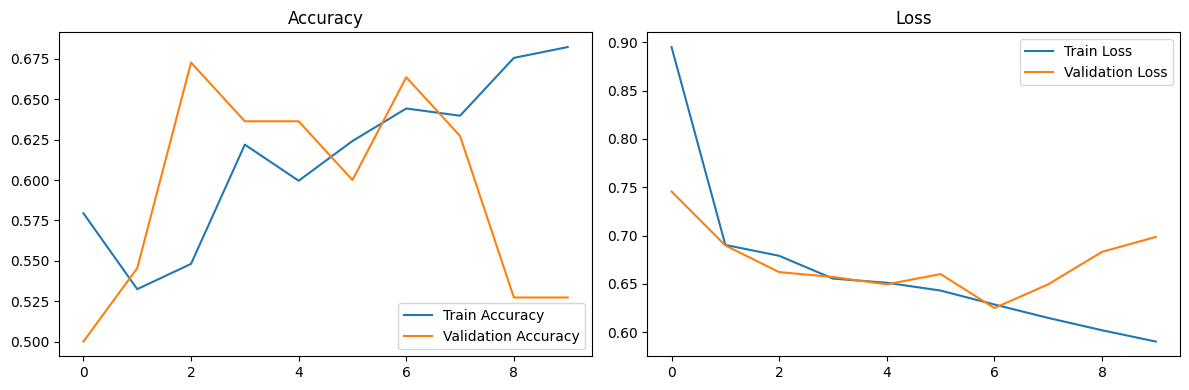

In [22]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# function to Predict a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Dog 🐶" if prediction > 0.5 else "Cat 🐱"
    confidence = prediction if prediction > 0.5 else 1 - prediction
    print(f"Prediction: {label} ({confidence*100:.2f}% confidence)")

In [ ]:
# trying to predict a dog image

predict_image("dataset/test/dogs/dog_75.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Prediction: Dog 🐶 (77.18% confidence)


In [31]:
# trying to predict a cat image

predict_image("dataset/test/cats/cat_106.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Cat 🐱 (55.58% confidence)
